<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Module 49</b></font><center>
                <center><font size="6">Digital Innovations for Water Challenges</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Notebook 2.c</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>Temporal aggregation from tiff files</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='images\ihe-delft-institute_unesco_fc-lr.jpg'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction](#introduction)
3. [Aggregation from tiff files](#tiff)
4. [Aggregation from one .nc file](#nc)

# 1. Learning objectives<a name="learningobs"></a>

- Use xarray to open .tiff and .nc files
- Cycle through files in a directory
- Plot tiff and .nc files
- Make yearly map from monthly data 

# 2. Introduction<a name="introduction"></a>
In this notebook you will learn how to make basic aggregations of .tiff files by cycling through files in a folder and of .nc files using xarray.
You will need the following packages installed:
> xarray

In [1]:
import os
import glob
import xarray as xr

### 3. Aggregation from tiff files <a name='tiff'></a>
First, navigate to the folder where you downloaded the data using notebook 1.a.

In [2]:
path1 = r"D:/GitHub/Module 49/CHIRPS_tiff" #modify this line as needed
os.chdir(path1)

### 3.a. Opening one tiff file

In [3]:
filename = r"chirps-v2.0.2020.01.tif"
data = xr.open_rasterio(filename)

Inspect the data: how many rows and columns does your data have? 

In [4]:
data

<xarray.DataArray (band: 1, y: 1600, x: 1500)>
[2400000 values with dtype=float32]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 39.97 39.92 39.87 39.82 ... -39.83 -39.88 -39.93 -39.98
  * x        (x) float64 -19.97 -19.92 -19.87 -19.82 ... 54.83 54.88 54.93 54.98
Attributes: (12/15)
    transform:                 (0.05000000074505806, 0.0, -20.0, 0.0, -0.0500...
    crs:                       +init=epsg:4326
    res:                       (0.05000000074505806, 0.05000000074505806)
    is_tiled:                  0
    nodatavals:                (nan,)
    scales:                    (1.0,)
    ...                        ...
    TIFFTAG_DOCUMENTNAME:      /home/CHIRPS/monthly/v2.0/africa/chirps-v2.0.2...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100

#### 3.b. Simple plot 
As the data has only one band, running the line below will produce a map of the data

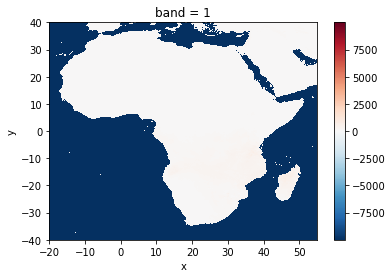

In [5]:
data.plot()

### 3.c. Masking out no data values
You will notice the data over land looks washed out - this is because the no data value of -9999 was not correctly identified. To mask out these values and obtain a better map try the following cell.

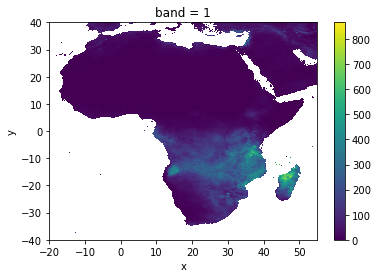

In [6]:
ds_masked = data.where(data != -9999.) #this keeps only data for pixels with values different than -9999
ds_masked.plot()

### 3.d Yearly precipitation from monthly
Now we will open all data one after the other and make a map of the yearly sum of precipitation.<br>
#### Step 1: Getting all the file names

In [7]:
#glob allows you to list all files in a folder. 
#You can also specify what the file name needs to look like for inclusion using the * wildcard as shown here
glob.glob('*.tif')

['chirps-v2.0.2020.01.tif',
 'chirps-v2.0.2020.02.tif',
 'chirps-v2.0.2020.03.tif',
 'chirps-v2.0.2020.04.tif',
 'chirps-v2.0.2020.05.tif',
 'chirps-v2.0.2020.06.tif',
 'chirps-v2.0.2020.07.tif',
 'chirps-v2.0.2020.08.tif',
 'chirps-v2.0.2020.09.tif',
 'chirps-v2.0.2020.10.tif',
 'chirps-v2.0.2020.11.tif']

#### Step 2: loop through the filenames to open the monthly data and produce a map of the sum

In [8]:
for i, filename in enumerate(glob.glob('*.tif')):
    data = xr.open_rasterio(filename)
    ds_masked = data.where(data != -9999.)
    if i == 0:
        data_sum = ds_masked
    else:
        data_sum += ds_masked

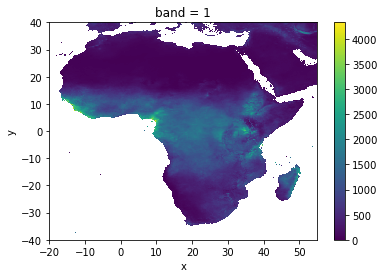

In [9]:
data_sum.plot()

# 4. Aggregating from one .nc file <a name='nc'></a>
Using notebook 1.a, download monthly CHIRPS data for the years 2020-2021 for the bounding box of your choice.

In [25]:
# replace with your own path
path_to_nc = r"D:\GitHub\Module 49\chirps20GlobalMonthlyP05_ea7a_a7e6_216e.nc"

In [26]:
data_nc = xr.open_dataset(path_to_nc)

Inspect your data - how many dimensions does this dataset have?

In [27]:
data_nc

<xarray.Dataset>
Dimensions:    (time: 24, latitude: 201, longitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2021-12-01
  * latitude   (latitude) float32 -9.975 -9.925 -9.875 ... -0.075 -0.025 0.025
  * longitude  (longitude) float32 5.025 5.075 5.125 5.175 ... 14.93 14.97 15.02
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2021-12-01T00:00:00Z
    time_coverage_start:       2020-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       5.024994

1. Average yearly P map
Produce a map of the average monthly precipitation over the area

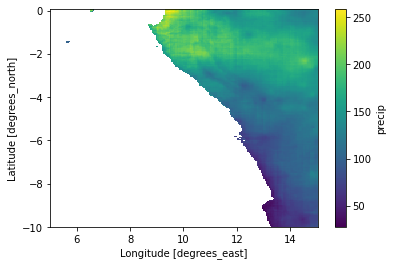

In [28]:
data_mean = data_nc.mean(dim='time')
data_mean.precip.plot()

2. Yearly average and sum
From the monthly data compute and plot a yearly average time series

In [56]:
yearly_mean = data_nc.groupby('time.year').mean('time')
yearly_sum = data_nc.groupby('time.year').sum('time', skipna=False)

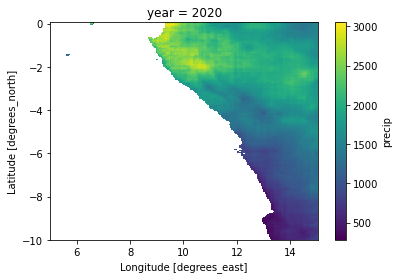

In [57]:
yearly_sum.precip.loc[{'year':2020}].plot()

Get mean average precipitation for whole area:

In [65]:
yearly_sum.precip.mean(dim=['latitude', 'longitude'])

<xarray.DataArray 'precip' (year: 2)>
array([1615.7255, 1647.5775], dtype=float32)
Coordinates:
  * year     (year) int64 2020 2021

3. Montly average    
From the data make a bar plot of average precipitation for the months of the year